In [6]:
%matplotlib notebook
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import *
from pylab import *

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data

city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset

combined_df = pd.merge(city_df, ride_df, on="city")

# Display the data table for preview
average_fare = combined_df.groupby(["city"]).mean()["fare"]
total_rides = combined_df.groupby(["city"]).count()["type"]
total_drivers = combined_df.groupby(["city"]).sum()["driver_count"]
city_type = combined_df.groupby(["city"])["type"].value_counts()

data_table = pd.DataFrame({"Average Fare": average_fare,
                          "Total Rides": total_rides,
                          "Total Drivers": total_drivers})
data_table.head()


,Average Fare,Total Rides,Total Drivers
city,,,
Amandaburgh,24.641667,18,216
Barajasview,25.332273,22,572
Barronchester,36.422500,16,176
Bethanyland,32.956111,18,396
Bradshawfurt,40.064000,10,70


# Bubble Plot of Ride Sharing Data

<IPython.core.display.Javascript object>


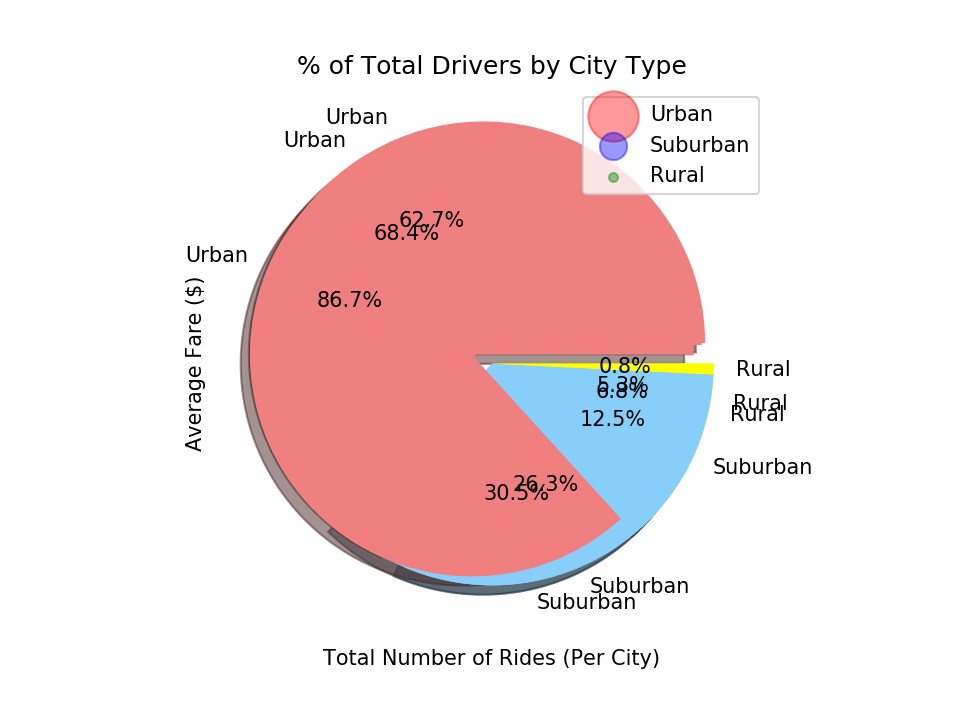

In [7]:
# Obtain the x and y coordinates for each of the three city types

urban_df = combined_df.loc[(combined_df["type"] == "Urban")]
urban_average_fare = urban_df.groupby(["city"]).mean()["fare"]
urban_total_rides = urban_df.groupby(["city"]).count()["type"]
urban_total_drivers = urban_df.groupby(["city"]).sum()["driver_count"]


suburban_df = combined_df.loc[(combined_df["type"] == "Suburban")]
suburban_average_fare = suburban_df.groupby(["city"]).mean()["fare"]
suburban_total_rides = suburban_df.groupby(["city"]).count()["type"]
surban_total_drivers = suburban_df.groupby(["city"]).sum()["driver_count"]


rural_df = combined_df.loc[(combined_df["type"] == "Rural")]
rural_average_fare = rural_df.groupby(["city"]).mean()["fare"]
rural_total_rides = rural_df.groupby(["city"]).count()["type"]
rural_total_drivers = rural_df.groupby(["city"]).sum()["driver_count"]


# Build the scatter plots for each city types

plt.scatter(urban_total_rides, urban_average_fare, s=urban_total_drivers/2, c="red", alpha = 0.4, label = "Urban")
plt.scatter(suburban_total_rides, suburban_average_fare, s=surban_total_drivers/2, c="blue", alpha = 0.4, label = "Suburban")
plt.scatter(rural_total_rides, rural_average_fare, s=rural_total_drivers/2, c="green", alpha = 0.4, label = "Rural")

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

# Create a legend
plt.legend(loc="upper right")

# Incorporate a text label regarding circle size
textstr = "Note: Circle size correlates with driver count per city "
plt.text(25, 35, textstr, fontsize=6)
plt.grid(True)

# Save Figure:
plt.savefig("../Images/PyberRideSharingData.png")


# Total Fares by City Type

In [8]:
# Calculate Type Percents

urban_df = combined_df.loc[(combined_df["type"] == "Urban")]
urban_total_fare1 = sum(urban_df.groupby(["city"]).sum()["fare"])

suburban_df = combined_df.loc[(combined_df["type"] == "Suburban")]
suburban_total_fare1 = sum(suburban_df.groupby(["city"]).sum()["fare"])


rural_df = combined_df.loc[(combined_df["type"] == "Rural")]
rural_total_fare1 = sum(rural_df.groupby(["city"]).sum()["fare"])

# Build Pie Chart
labels = ["Urban", "Suburban", "Rural"]
sizes = [urban_total_fare1, suburban_total_fare1, rural_total_fare1]
colors = ["lightcoral", "lightskyblue", "yellow"]
explode = (0.1, 0, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=0)
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("../Images/Ttotalfarescitytype.png")


# Total Rides by City Type

In [9]:
# Calculate Ride Percents
urban_df = combined_df.loc[(combined_df["type"] == "Urban")]
urban_total_rides2 = sum(urban_df.groupby(["city"]).count()["type"])

suburban_df = combined_df.loc[(combined_df["type"] == "Suburban")]
suburban_total_rides2 = sum(suburban_df.groupby(["city"]).count()["type"])

rural_df = combined_df.loc[(combined_df["type"] == "Rural")]
rural_total_rides2 = sum(rural_df.groupby(["city"]).count()["type"])

# Build Pie Chart
labels = ["Urban", "Suburban", "Rural"]
sizes = [urban_total_rides2, suburban_total_rides2, rural_total_rides2]
colors = ["lightcoral", "lightskyblue", "yellow"]
explode = (0.1, 0, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=0)
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("../Images/Ttotalridescitytype.png")


# Total Drivers by City Type

In [10]:
# Calculate Driver Percents

urban_df = combined_df.loc[(combined_df["type"] == "Urban")]
urban_total_drivers3 = sum(urban_df.groupby(["city"]).sum()["driver_count"])

suburban_df = combined_df.loc[(combined_df["type"] == "Suburban")]
suburban_total_drivers3 = sum(suburban_df.groupby(["city"]).sum()["driver_count"])

rural_df = combined_df.loc[(combined_df["type"] == "Rural")]
rural_total_drivers3 = sum(rural_df.groupby(["city"]).sum()["driver_count"])


# Build Pie Charts
labels = ["Urban", "Suburban", "Rural"]
sizes = [urban_total_drivers3, suburban_total_drivers3, rural_total_drivers3]
colors = ["lightcoral", "lightskyblue", "yellow"]
explode = (0.1, 0, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=0)
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("../Images/Ttotaldriverscitytype.png")
